/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


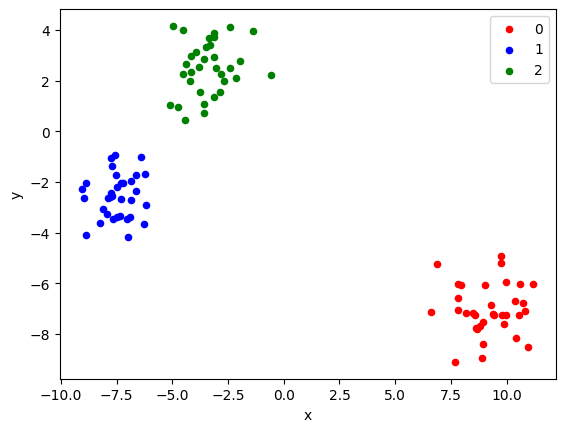

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


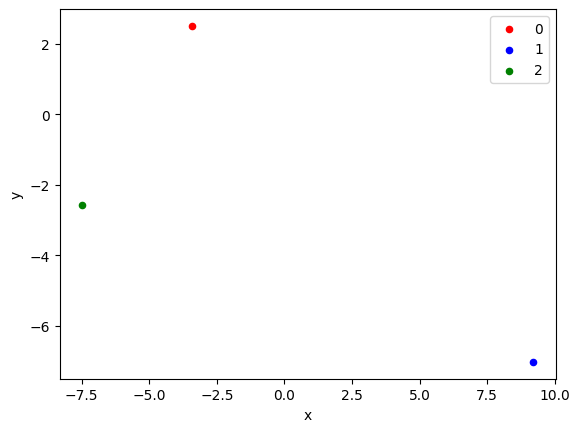

[[-3.2925366   3.39741302]
 [-3.47502562  3.32841189]
 [-6.62886399 -1.73684387]
 [-2.43572958  4.10771434]
 [-4.43117887  0.43834119]
 [-7.76033763 -1.03794802]
 [ 7.84159507 -7.06946613]
 [-7.58244472 -0.93828717]
 [ 9.75715265 -4.91369827]
 [-2.85489881  1.54909007]
 [-6.99459247 -4.17672276]
 [10.82637559 -7.09249077]
 [-4.5301483   4.00645215]
 [ 7.82134797 -6.58197413]
 [-4.77188006  0.96022095]
 [-8.95222315 -2.61435063]
 [-2.82654143  2.26848686]
 [-6.88192137 -1.98182817]
 [-6.21669494 -1.68627575]
 [-4.20236611  1.96848203]
 [-3.12967468  3.88174401]
 [ 8.58622277 -7.2319419 ]
 [-0.56440035  2.22831804]
 [-8.10917524 -3.07600782]
 [10.57467002 -7.23612331]
 [ 7.81453323 -6.02477421]
 [-3.34465516  3.68177967]
 [-3.03521908  2.51226156]
 [11.19998764 -6.0347281 ]
 [ 8.78985802 -7.68236507]
 [-6.17409631 -2.89259155]
 [-4.37731312  2.6351375 ]
 [ 9.75945441 -5.21540929]
 [-6.8593488  -2.72683896]
 [ 9.45259068 -7.26035588]
 [-7.29095377 -2.68900203]
 [ 9.95996113 -7.23691036]
 

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
X,y=make_blobs(n_samples=100,centers=3,n_features=2)
def plot_points(X,y):
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  colors = {0:'red', 1:'blue',2:'green'}
  fig, ax = plt.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()  
  pass
plot_points(X,y)
kmeans=KMeans(n_clusters=3).fit(X)
centroids=kmeans.cluster_centers_
centroid_labels=kmeans.predict(centroids)
plot_points(centroids,centroid_labels)
print(X)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


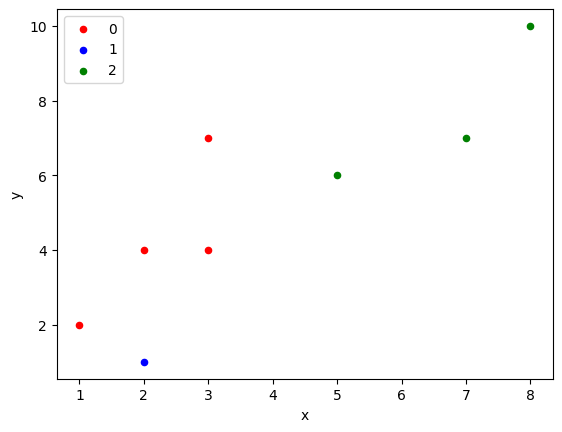

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


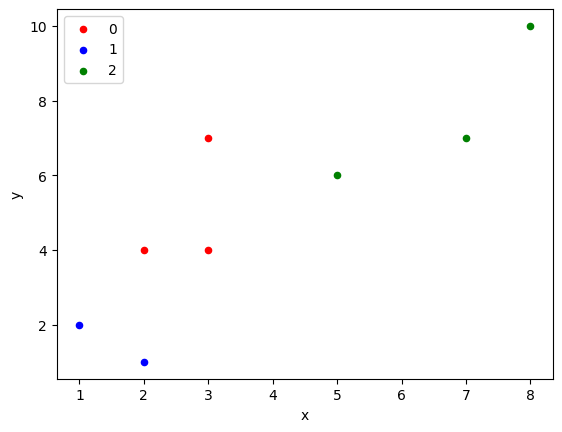

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


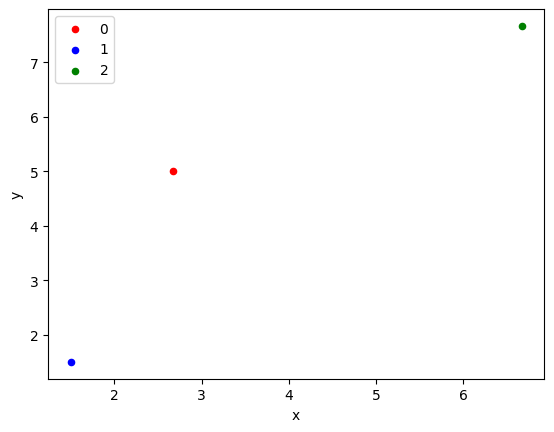

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
X=np.array([[1,2],[2,1],[3,4],[8,10],[3,7],[5,6],[2,4],[7,7]])
y=np.array([0,1,0,2,0,2,0,2])
def plot_points(X,y):
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  colors = {0:'red', 1:'blue',2:'green'}
  fig, ax = plt.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()  
  pass
plot_points(X,y)
centroids = np.array([[1,2],[2,1],[8,10]])
kmeans=KMeans(n_clusters=3,init=centroids).fit(X)
centroid_labels=kmeans.predict(X)
plot_points(X,centroid_labels)
plot_points(kmeans.cluster_centers_,[0,1,2])

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
def plot_digits(X):
  fig, ax = plt.subplots(len(X)//5,5, figsize = (8,3)) 
  centers = X
  for axi, center in zip(ax.flat, centers):
    center=center.reshape(8,8)
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
  pass
digits=load_digits()
ds=digits.keys()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=146)
kmeans=KMeans(n_clusters=10).fit(X_train)
centroids=kmeans.cluster_centers_
centroid_labels=kmeans.predict(centroids)
map={}
length=len(X_train)
for _ in range(length):
  x,y=X_train[_],y_train[_]
  if(len(map)>=10): break
  map[kmeans.predict([x])[0]]=y
  pass
y=kmeans.predict(X_test)
y=[map[elem] for elem in y]
for i in range(10):
  mask=(y==i)
  print(mask)
  pass
silhouette_avg = silhouette_score(X_test, kmeans.predict(X_test))
print("silhouette_avg : ",silhouette_avg)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


False
False
False
False
False
False
False
False
False
False
silhouette_avg :  0.16709837528256874


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

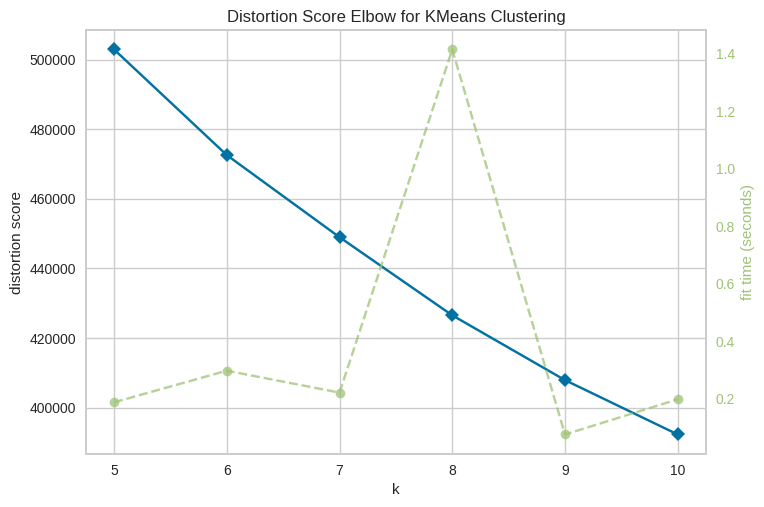

y is :  [6, 3, 7, 6, 0, 5, 6, 4, 3, 6]


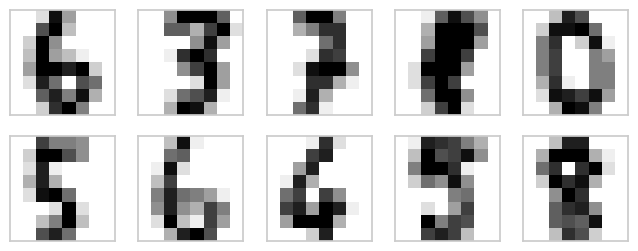

In [6]:
visualizer=KElbowVisualizer(kmeans,k=(5,11))
visualizer.fit(X_test)
visualizer.show()
plot_digits(X_test[0:10])
print("y is : ",y[0:10])

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,confusion_matrix,accuracy_score,precision_score,recall_score
from yellowbrick.cluster import KElbowVisualizer

def plot_digits(X):
  fig, ax = plt.subplots(len(X)//5,5, figsize = (8,3))
  centers = X
  for axi, center in zip(ax.flat, centers):
    center=center.reshape(8,8)
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
  pass
def measures(y_true,y_pred):
  print(confusion_matrix(y_true,y_pred))
  return {
      "accuracy":accuracy_score(y_test,y_pred),
      "precision":precision_score(y_test,y_pred,average='micro'),
      "recall":recall_score(y_test,y_pred,average='micro')
  }
  pass

In [17]:
digits=load_digits()
ds=digits.keys()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=146)
kmeans=KMeans(n_clusters=10).fit(X_train)
centroids=kmeans.cluster_centers_
centroid_labels=kmeans.predict(centroids)
map={}
length=len(X_train)
for _ in range(length):
  x,y=X_train[_],y_train[_]
  if(len(map)>=10): break
  map[kmeans.predict([x])[0]]=y
  pass
y=kmeans.predict(X_test)
y=[map[elem] for elem in y]
for i in range(10):
  mask=(y==i)
  print(mask)
  pass
silhouette_avg = silhouette_score(X_test, kmeans.predict(X_test))
print("silhouette_avg : ",silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


False
False
False
False
False
False
False
False
False
False
silhouette_avg :  0.16651469821073683


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

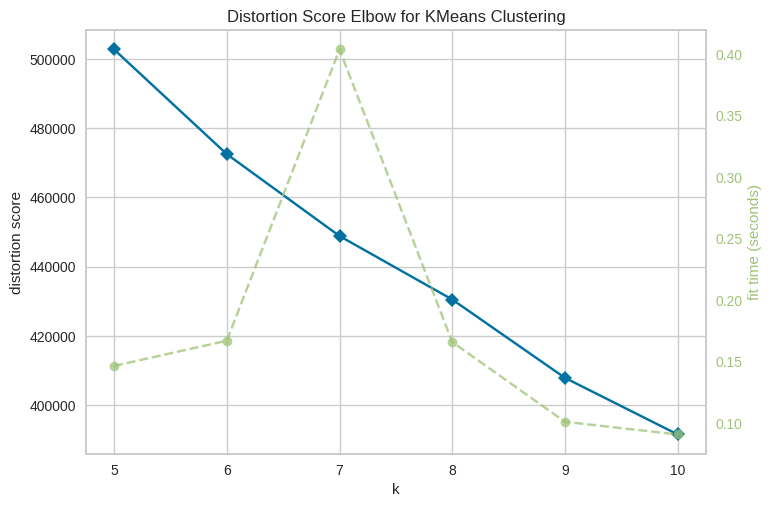

[[48  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  1 20  0 35  0  0  0]
 [ 0  0 47  8  0  0  3  1  0  0]
 [ 0  0  1 58  0  0  1  1  0  0]
 [ 0  0  0  0 65  0  2  3  0  0]
 [ 0  0  0  9  1 41  0  0  0  0]
 [ 1  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  1  3  0 56  0  0]
 [ 0  0  4 19  0  4 37  0  0  0]
 [ 0  0  0 45  5  1  0  2  0  0]]
accuracy 0.6313131313131313
precision 0.6313131313131313
recall 0.6313131313131313


In [18]:
visualizer=KElbowVisualizer(kmeans,k=(5,11))
visualizer.fit(X_test)
visualizer.show()
metrics=measures(y_test,y)
for metric in metrics:
  print(metric,metrics[metric])

In [11]:
import numpy as np
from sklearn.cluster import KMeans
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
init_centroids = np.array([X[0], X[3], X[6]])
kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1, max_iter=3).fit(X)
print("Final cluster assignments:", kmeans.labels_)
print("Final centroids:", kmeans.cluster_centers_)

Final cluster assignments: [0 2 1 0 1 1 2 0]
Final centroids: [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
